<a href="https://colab.research.google.com/github/petroniocandido/STPE/blob/main/S%C3%A9ries_Temporais_e_Processos_Estoc%C3%A1sticos_Processos_Gaussianos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processos Gaussianos
**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, multivariate_normal

## $\mathcal{N}(\mu,\Sigma)$ - A Distribuição Normal Gaussiana Conjunta (Multivariada)

Seja $\vec{X} = [X_0, \ldots, X_d]$ um vetor aleatório com $d$ dimensões. Se $\vec{X}$ é normalmente distribuído, tal que:
$$
\vec{X} \sim \mathcal{N}(\vec{\mu}, \Sigma)
$$

Onde $\vec{\mu} = [\mu_0, \ldots, \mu_d]$ é o vetor dos valores médios e $\Sigma \in \mathbb{R}^{d \times d}$ é a matriz de covariância, tal que $\Sigma[i,j] =\sigma_{i,j} = \mathbb{Cov}(X_i, X_j)$

$$
\left[\begin{array}{c}X_0 \\ \vdots \\ X_n\end{array}\right] \sim \mathcal{N}\left( \left[\begin{array}{c}\mu_0 \\ \vdots \\ \mu_n\end{array}\right] , \left[ \begin{array}{ccc} \sigma_0, & \ldots, & \sigma_{0,n} \\ \vdots & \vdots & \vdots \\ \sigma_{n,0}, & \ldots, & \sigma_n\end{array} \right] \right)
$$

A distribuição de probabilidade conjunta $P(\vec{X} = \vec{x})$ das $d$ variáveis é dada pela função de densidade de probabilidade Gaussiana:

$$
P( \vec{x}\;|\; \vec{\mu},\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}exp \left( −\frac{1}{2}(\vec{x}−\vec{\mu})^T\Sigma^{−1}(\vec{x}−\vec{\mu})\right)
$$

In [ ]:
def plotar_gaussiana2d(mu, sigma, n):

  fig = plt.figure(figsize=(10,5))

  ax = fig.add_subplot(1, 2, 1)

  X = np.random.multivariate_normal(mu, cov=sigma, size=n*3)
  ax.scatter(X[:,0], X[:,1])
  ax.set_xlabel('$X_1$')
  ax.set_ylabel('$X_2$')

  ax = fig.add_subplot(1, 2, 2, projection='3d')

  var = multivariate_normal(mean=mu, cov=sigma)
  mult_norm = lambda x, y: var.pdf([x,y])

  X = np.linspace(-3, 3, n)
  Y = np.linspace(-3, 3, n)
  Z = np.array([[mult_norm(x,y) for y in Y] for x in X])

  X, Y = np.meshgrid(X, Y)

  #ax = fig.gca(projection='3d')
  ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                  cmap=cm.viridis)

  cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.25, cmap=cm.viridis)
  
  ax.set_xlabel('$X_1$')
  ax.set_ylabel('$X_2$')
  ax.set_zlabel('$P[X_1, X_2]$')

  ax.set_zlim(-0.25,0.2)
  ax.set_zticks(np.linspace(0,0.2,5))
  ax.view_init(27, -21)

  plt.tight_layout()



$$
\left[ \begin{array}{c} X_1 \\ X_2\end{array} \right] \sim \mathcal{N}\left(  \left[ \begin{array}{c} 0 \\ 0 \end{array} \right] , \left[ \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right] \right)
$$

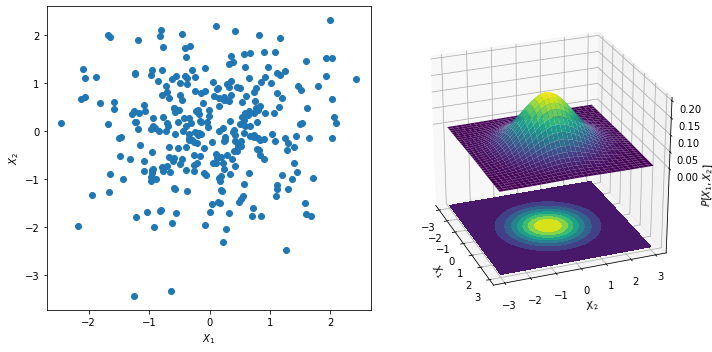

In [ ]:
n = 100
mu = np.zeros(2)
sigma = np.eye(2)

plotar_gaussiana2d(mu, sigma, n)

$$
\left[ \begin{array}{c} X_1 \\ X_2\end{array} \right] \sim \mathcal{N}\left(  \left[ \begin{array}{c} 0 \\ 0 \end{array} \right] , \left[ \begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array} \right] \right)
$$

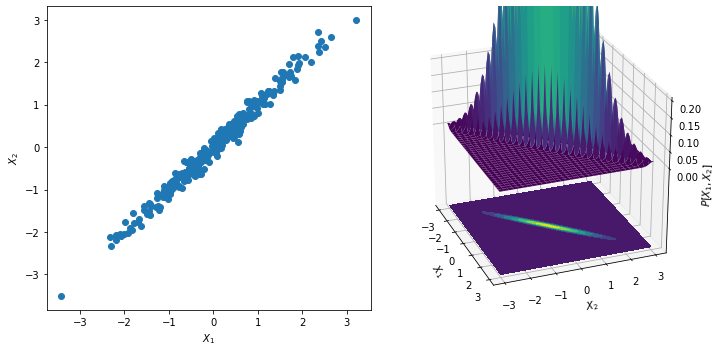

In [ ]:
mu = np.zeros(2)
sigma = np.array([[1, 0.99], [0.99, 1]])
plotar_gaussiana2d(mu, sigma, n)

$$
\left[ \begin{array}{c} X_1 \\ X_2\end{array} \right] \sim \mathcal{N}\left(  \left[ \begin{array}{c} 0 \\ 0 \end{array} \right] , \left[ \begin{array}{cc} 1 & -0.5 \\ -0.5 & 1 \end{array} \right] \right)
$$

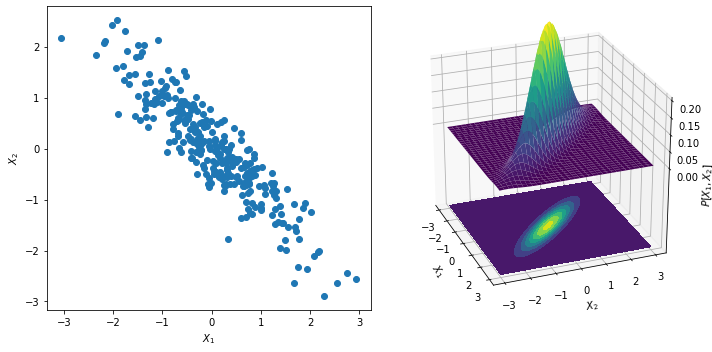

In [ ]:
mu = np.zeros(2)
sigma = np.array([[1, -0.9], [-0.9, 1]])
plotar_gaussiana2d(mu, sigma, n)

### Determinando a Distribuição Normal Condicional

Dado a gaussiana multivariada:

$$
\left[ \begin{array}{c} X_1 \\ X_2\end{array} \right] \sim \mathcal{N}\left(  \left[ \begin{array}{c} \mu_1 \\ \mu_2 \end{array} \right] , \left[ \begin{array}{cc} \sigma_1 & \sigma_{1,2} \\ \sigma_{2,1} & \sigma_2 \end{array} \right] \right)
$$

É possível determinar a densidade condicional $P(X_1 | X_2 = x_2) = \mathcal{N}(\mu_{1|2}, \sigma_{1|2})$ através de:

$$
\mu_{1|2} = \mu_1 + \sigma_{1,2}\cdot\sigma_2^{-1}\cdot(x_2 - \mu_2)
$$

$$
\sigma_{1|2} = \sigma_1 + \sigma_{1,2}\cdot\sigma_2^{-1}\cdot\sigma_{2,1}
$$

Esses valores também são estimadores de $\hat{X_1} = \mu_{1|2}$ e sua variância $\hat{\sigma_1} = \sigma_{1|2}$ (a incerteza média), usando um valor conhecido de $X_2 = x_2$, tal que:
$$
\hat{X_1} = \mu_{1|2} = \mathbb{E}[X_1 | X_2 = x_2]
$$
$$
\hat{\sigma_1} = \sigma_{1|2} = \mathbb{Var}[X_1 | X_2 = x_2]
$$

In [ ]:
def calcular_normal_condicional(x2, mu, sigma):
  mu12 = mu[0] + sigma[0, 1] * (sigma[1, 1] ** -1) * (x2 - mu[1])
  sigma12 = sigma[0, 0] + sigma[0, 1] * (sigma[1,1] ** -1) * sigma[1, 0]
  return mu12, sigma12

def plotar_gaussiana_condicional(x2, mu, sigma, n):
   
  mu12, sigma12 = calcular_normal_condicional(x2, mu, sigma)

  XX = np.random.multivariate_normal(mu, cov=sigma, size=n*3)

  Z = np.array([norm.pdf(x[0], loc=mu12, scale=sigma12) for x in XX])
  
  plt.scatter(XX[:,0], XX[:,1],c=Z, cmap=cm.viridis)

  plt.xlabel("$X_1$")
  plt.ylabel("$X_2$")

  plt.colorbar()
  

$$
\left[ \begin{array}{c} X_1 \\ X_2\end{array} \right] \sim \mathcal{N}\left(  \left[ \begin{array}{c} 0 \\ 0 \end{array} \right] , \left[ \begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array} \right] \right)
$$

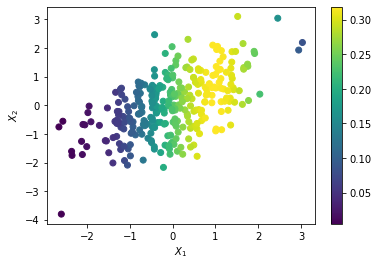

In [ ]:
mu = np.zeros(2)
sigma = np.array([[1, 0.5], [0.5, 1]])

plotar_gaussiana_condicional(2, mu, sigma, 100)

## $\mathcal{GP}(\mu,\Sigma)$ - Processos Gaussianos

Um Processo Gaussiano $\mathcal{GP}(\vec{\mu},\Sigma)$ é um processo estocástico de domínio contínuo $\Omega \in \mathbb{R}$ e tempo contínuo $\mathrm{T} \in \mathbb{R}$. 

Um processo estocástico $X$ é um Processo Gaussiano tal que $X \sim \mathcal{GP}(\vec{\mu}, \Sigma)$ onde $\vec{\mu} \in \mathbb{R}^n$ é o vetor dos valores médios e $\Sigma \in \mathbb{R}^{n\times n}$ é a matriz de autocovariâncias, tal que $\Sigma[i,j] = \gamma_{i,j} = \mathbb{Cov}[X_i, X_j]$, $\forall i,j \in \mathrm{T}$.

$$
\vec{\mu} = \left[ \begin{array}{c} \mu_0 \\ \ldots \\ \mu_n \end{array} \right]
$$

$$
\Sigma = \left[ \begin{array}{ccc} \gamma_{0,0}, & \ldots, & \gamma_{0,n} \\ \ldots & \ldots & \ldots \\ \gamma_{n,0}, & \ldots, & \gamma_{n,n}\end{array} \right]
$$


$X \sim \mathcal{GP}(\vec{\mu}, \Sigma)$ implica que cada Variável Aleatória $X_t \in X$ é normalmente distribuída, tal que $X_t \sim \mathcal{N}(\mu_t, \sigma_t)$, e que qualquer Vetor Aleatório subconjunto de $X$ é normalmente distribuído, tal que $[X_t, \ldots, X_{t+n}] \sim \mathcal{N}(\vec{\mu}, \Sigma)$, para quaisquer $t\in\mathrm{T}$.



In [ ]:
def simular_gp(mu, sigma, m, ax=None):
  X = np.random.multivariate_normal(mu, cov=sigma, size=m)
  d = mu.shape[0]

  if ax is None:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

  for i in range(m):
    ax.plot(X[i,:])
  ax.set_xlabel("T")
  ax.set_ylabel("$X_i$")
  ax.set_xticks([i for i in range(d)])

### $\mathcal{GP}$ de Ruído Branco e TSP

* WGN 
$$
\left[ \begin{array}{c} X_1 \\ X_2\end{array} \right] \sim \mathcal{N}\left(  \left[ \begin{array}{c} 0 \\ 0 \end{array} \right] , \left[ \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right] \right)
$$

* TSP implica que $\mu_t = \alpha\cdot t + \beta$

In [ ]:
def mu_estacionario(d):
  return np.zeros(d)

def mu_tendencia_linear(a,b,d):
  return np.linspace(a,b,d)

def sigma_iid(d):
  return np.eye(d)

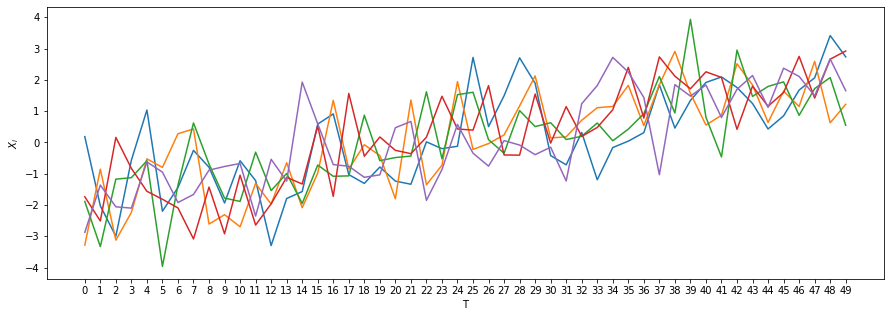

In [ ]:
n = 5
d = 50

#mu = mu_estacionario(d)
mu = mu_tendencia_linear(-2, 2, d)
sigma = sigma_iid(d)

simular_gp(mu, sigma, n)

### $\mathcal{GP}$ de Passeio Aleatório e AutoRegressivo

$$X_0 = \mathcal{N}(0,1)$$
$$X_t = X_{t-1} + \mathcal{N}(0,1)$$

In [ ]:
def sigma_rw(d):
  sigma = np.zeros((d,d))
  for i in range(d):
    for j in range(i,d):
      ii = i + 1
      jj = j + 1
      v = ii*np.exp((ii-jj)/ii)
      sigma[i,j] = v
      sigma[j,i] = v
  return sigma

In [ ]:
sigma_rw(5)

array([[1.        , 0.36787944, 0.13533528, 0.04978707, 0.01831564],
       [0.36787944, 2.        , 1.21306132, 0.73575888, 0.44626032],
       [0.13533528, 1.21306132, 3.        , 2.14959393, 1.54025136],
       [0.04978707, 0.73575888, 2.14959393, 4.        , 3.11520313],
       [0.01831564, 0.44626032, 1.54025136, 3.11520313, 5.        ]])

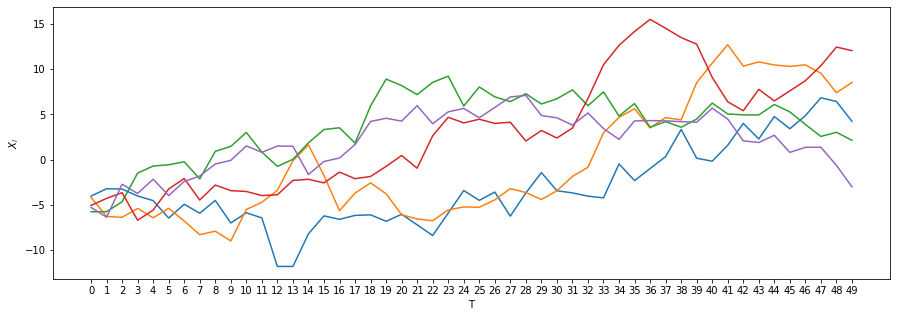

In [ ]:
#mu = mu_estacionario(d)
mu = mu_tendencia_linear(-5, 5, d)

sigma = sigma_rw(d)

simular_gp(mu, sigma, n)

### $\mathcal{GP}$ Periódico (CSP)

$$X_{0..P} = \mathcal{N}(0,1)$$

$$X_{t} = X_{t \mod p} + \mathcal{N}(0,1)$$

In [ ]:
def sigma_periodica(d, p):
  sigma = np.zeros((d,d))
  for i in range(d):
    for j in range(i,d):
      ii = i + 1
      jj = j + 1
      v = np.cos(np.pi * (ii - jj)/p)
      sigma[i,j] = v
      sigma[j,i] = v
  return sigma

In [ ]:
sigma_periodica(10, 5)

array([[ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
        -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699],
       [ 0.80901699,  1.        ,  0.80901699,  0.30901699, -0.30901699,
        -0.80901699, -1.        , -0.80901699, -0.30901699,  0.30901699],
       [ 0.30901699,  0.80901699,  1.        ,  0.80901699,  0.30901699,
        -0.30901699, -0.80901699, -1.        , -0.80901699, -0.30901699],
       [-0.30901699,  0.30901699,  0.80901699,  1.        ,  0.80901699,
         0.30901699, -0.30901699, -0.80901699, -1.        , -0.80901699],
       [-0.80901699, -0.30901699,  0.30901699,  0.80901699,  1.        ,
         0.80901699,  0.30901699, -0.30901699, -0.80901699, -1.        ],
       [-1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699,
         1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699],
       [-0.80901699, -1.        , -0.80901699, -0.30901699,  0.30901699,
         0.80901699,  1.        ,  0.80901699

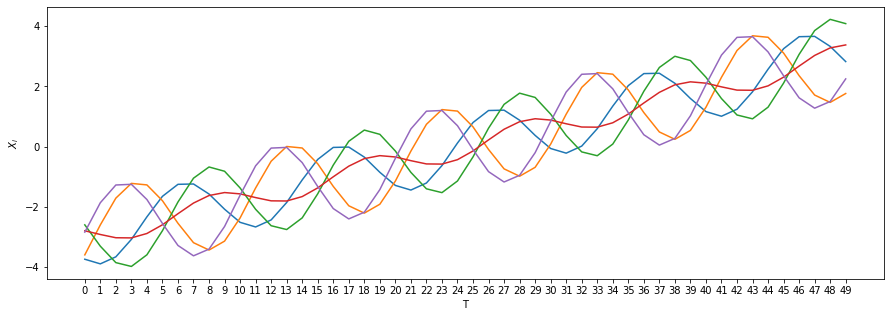

In [ ]:
#mu = mu_estacionario(d)
mu = mu_tendencia_linear(-3, 3, d)

sigma = sigma_periodica(d, 5)

simular_gp(mu, sigma, n)

## $m(\cdot)$ - Funções de Média

In [ ]:
T = np.linspace(0,100,100)

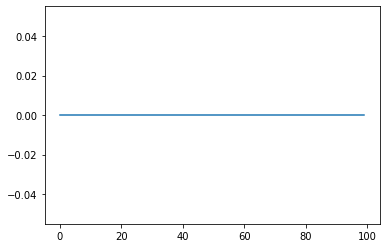

In [ ]:
def m_zeros(X, parametros):
  return np.zeros(X.shape)


plt.plot(T, m_zeros(T, []))

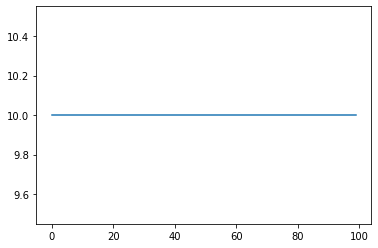

In [ ]:
def m_constante(X, parametros):
  c = parametros[0]
  return np.repeat(c, X.shape[0]).reshape(X.shape)

plt.plot(T, m_constante(T, [10]))

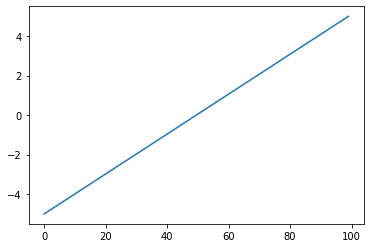

In [ ]:
def m_linear(X, parametros):
  a, b = parametros
  return np.linspace(a,b, X.shape[0]).reshape(X.shape)

plt.plot(T, m_linear(T, [-5, 5]))

## $\kappa(\cdot,\cdot)$ - Kernels

In [ ]:
def Cov(x1, x2, kernel, parametros):
  n1 = x1.shape[0]
  n2 = x2.shape[0]
  cov = np.zeros((n1,n2))
  for i in range(n1):
    cov[i] = kernel(x1[i], x2, parametros)
  return cov

def plotar_cov(cov, m):
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
  d = cov.shape[0]
  map = ax[0].matshow(cov)
  ax[0].set_xlabel("$X_1$")
  ax[0].set_ylabel("$X_2$")
  ax[0].set_title("$\Sigma$")
  fig.colorbar(map, ax=ax[0])
  simular_gp(m_zeros(x1, []).flatten(), cov, m, ax=ax[1])
  ax[1].set_title("Amostras do $\mathcal{GP}$")
  plt.tight_layout()


def plotar_kernel(x1, x2, kernel, parametros, mu=m_zeros, mu_parametros=[], m=5):
  cov = Cov(x1, x2, kernel, parametros)
  plotar_cov(cov, m)


T1 = np.linspace(0,100,100).reshape((100,1))
T2 = np.linspace(0,100,20).reshape((20,1))

### Linear

$$\kappa(X,Y) = X\cdot Y^T$$

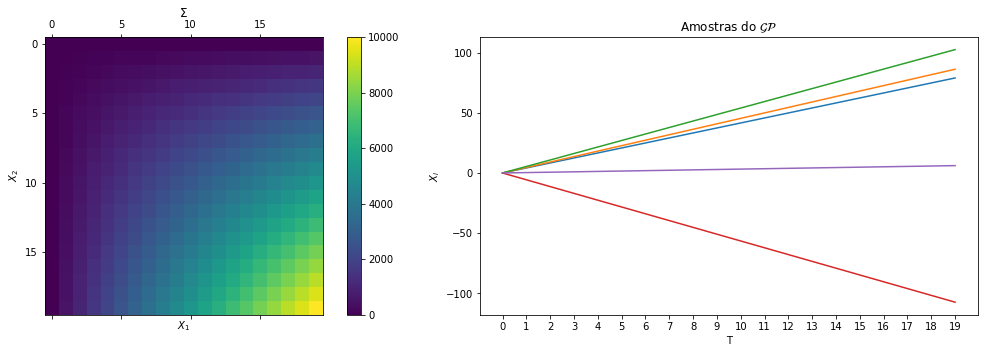

In [ ]:
def k_linear(x1, x2, parametros):
  return x1.dot(x2.T)

plotar_kernel(T2,T2, k_linear, [])

### Polinomial

$$\kappa(X,Y) = (X\cdot Y^T)^n$$

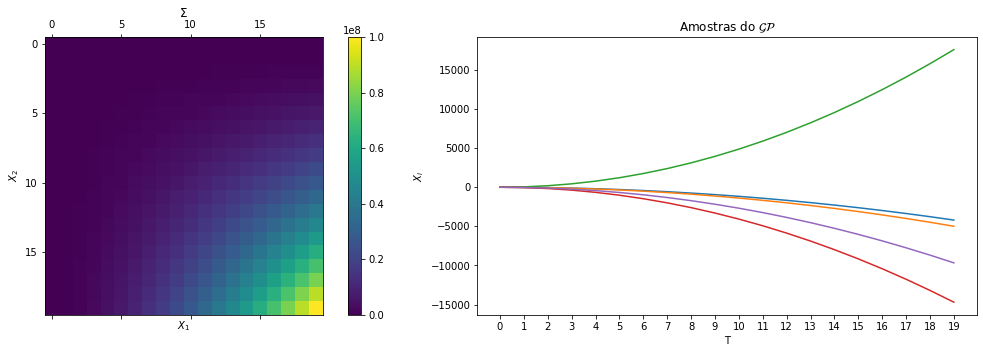

In [ ]:
def k_polinomial(x1, x2, parametros):
  return x1.dot(x2.T) ** parametros[0]

plotar_kernel(T2,T2, k_polinomial, [2])

### Gaussiano

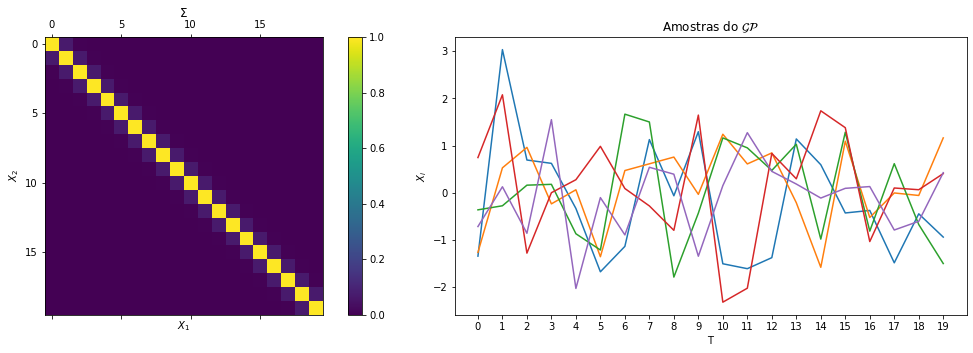

In [ ]:
def k_rbf(x1, x2, parametros):
  sigma = parametros[0]
  return np.exp(-.5*sigma**2 * np.sqrt(np.sum((x1 - x2)**2, axis=1))).flat

plotar_kernel(T2,T2, k_rbf, [1])

### Laplaciano

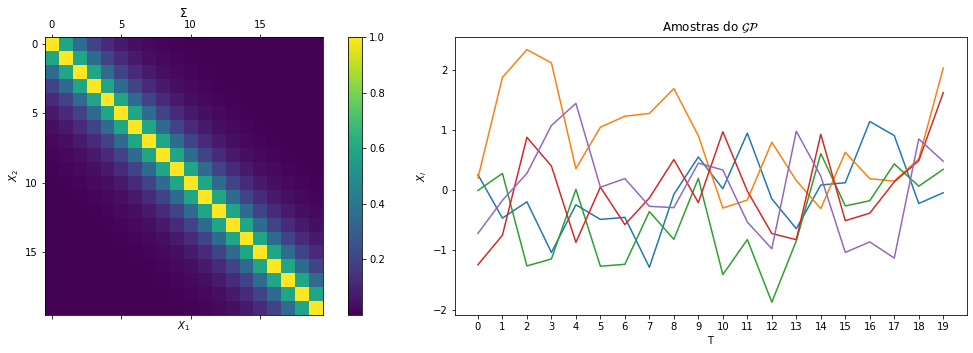

In [ ]:
def k_laplaciano(x1, x2, parametros): 
  alpha = np.array(parametros[0])
  return np.exp(-alpha * np.abs(x1 - x2)).flat

plotar_kernel(T2, T2, k_laplaciano, [.1])

### Periódico

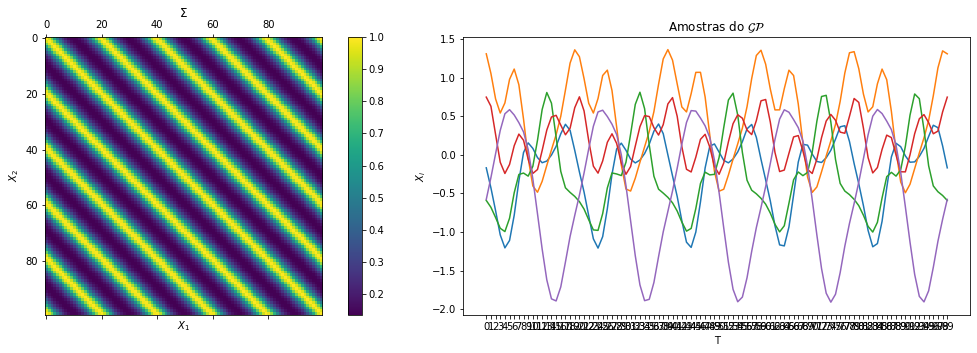

In [ ]:
def sin2(x):
  return (1 - np.cos(2*x))/2

def k_periodico(x1, x2, parametros):
  p = np.array(parametros[0])
  sigma = np.array(parametros[1])
  l = np.array(parametros[2])
  return sigma*np.exp(-(2 * sin2((np.pi * np.abs(x1 - x2))/p)/l)).flat

plotar_kernel(T1,T1, k_periodico, [20, 1, 1])

## Estimação

In [ ]:
from numpy import linalg

# X[t] = f(t)
def GP(Tc, Xc, Td, mu, kernel, mu_parametros=[], kernel_parametros=[], ruido=0):
  Scc = Cov(Tc, Tc, kernel, kernel_parametros) + np.eye(Xc.shape[0])*ruido
  Sdd = Cov(Td, Td, kernel, kernel_parametros)
  Scd = Cov(Tc, Td, kernel, kernel_parametros)
  Sdc = Scd.T
  Xd = mu(Td, mu_parametros) + Sdc.dot( linalg.inv(Scc)).dot(Xc - mu(Tc, mu_parametros))
  Sd = Sdd - Sdc.dot(linalg.inv(Scc)).dot(Scd)
  return Xd, Sd



### Passeio Aleatório (RW)

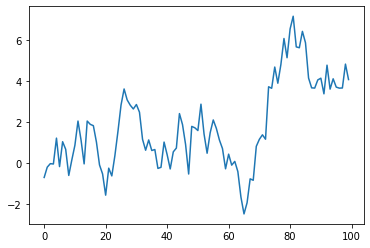

In [ ]:
n = 100
X = np.zeros(n)
Y = np.random.randn(n)
for i in range(n):
  X[i] = i
  if i > 0:
    Y[i] += Y[i-1]

plt.plot(X,Y)

Tc = X.reshape((n,1))
Xc = Y.reshape((n,1))

Text(0, 0.5, '$\\Omega$')

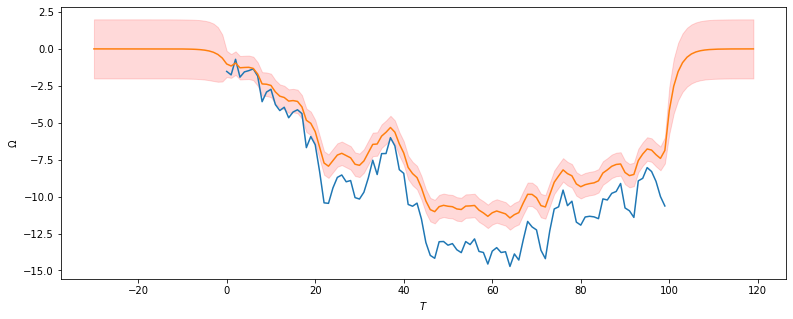

In [ ]:
# Extrapolação - T
Td = np.array([i for i in range(-30,120)]).reshape((150,1))

#Interpolação
#Td = np.array([i for i in np.arange(0.5, n, 1)]).reshape((n,1))

#Modelos
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_linear, ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_polinomial, kernel_parametros=[2], ruido=1)
Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_rbf, kernel_parametros=[1], ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_constante, k_rbf, mu_parametros=[2], kernel_parametros=[1], ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_laplaciano, kernel_parametros=[.2], ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_constante, k_laplaciano, mu_parametros=[10], kernel_parametros=[.2], ruido=1)


mud = Xd.flatten()
sigmad = np.diag(Sd)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))

ax.plot(Tc.flat, Xc.flat, label='Original')

ax.plot(Td.flat, mud)

_ = ax.fill_between( Td.flat, mud - 2*sigmad, mud + 2*sigmad, color='red', alpha=0.15,)

ax.set_xlabel("$T$")
ax.set_ylabel("$\Omega$")

### Processo Estacionário na Tendência (TSP)

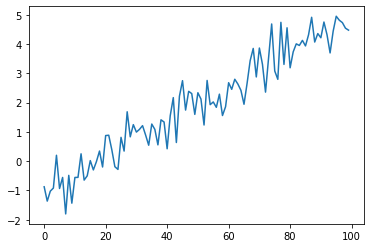

In [ ]:
n = 100
a = -1
b = 5
X = np.array([i for i in range(n)])
Y = np.linspace(a, b, n) + np.random.normal(0, 0.5,size=n)

plt.plot(X,Y)

Tc = X.reshape((n,1))
Xc = Y.reshape((n,1))

Text(0, 0.5, '$\\Omega$')

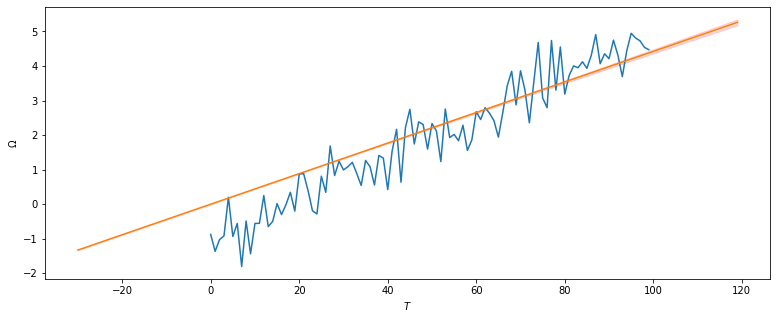

In [ ]:
# Extrapolação
Td = np.array([i for i in range(-30,120)]).reshape((150,1))

#Interpolação
#Td = np.array([i for i in np.arange(0.5, n, 1)]).reshape((n,1))

#Modelos
Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_linear, ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_polinomial, kernel_parametros=[2], ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_rbf, kernel_parametros=[1], ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_laplaciano, kernel_parametros=[.2], ruido=1)


mud = Xd.flatten()
sigmad = np.diag(Sd)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
ax.plot(Tc.flat, Xc.flat, label='Original')
ax.plot(Td.flat, mud)
_ = ax.fill_between( Td.flat, mud - 2*sigmad, mud + 2*sigmad, color='red', alpha=0.15,)
ax.set_xlabel("$T$")
ax.set_ylabel("$\Omega$")

### Processo Ciclo Estacionário (CSP)

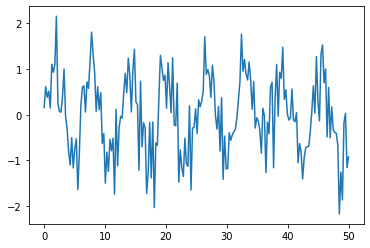

In [ ]:
n = 200
X = np.linspace(0,50, n) 
Y = np.sin(X) + np.random.normal(0, .5, n)
plt.plot(X,Y)

Tc = X.reshape((n,1)) 
Xc = Y.reshape((n,1))

#### Modelagem

Text(0, 0.5, '$\\Omega$')

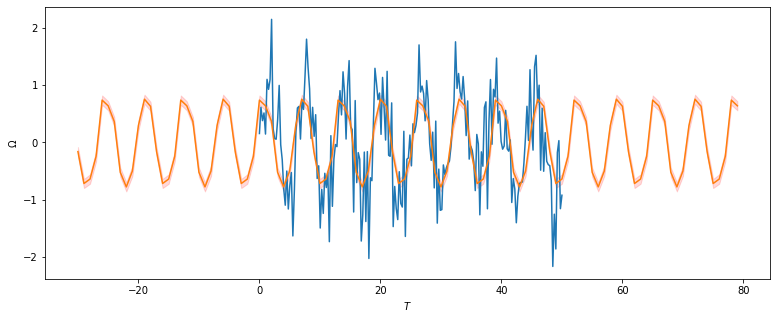

In [ ]:
# Interpolação
Td = np.array([i for i in range(-30,80)]).reshape((110,1))
#Extrapolação
#Td = np.array([i for i in np.arange(0.5, 50, 1)]).reshape((50,1))

#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_linear, ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_rbf, kernel_parametros=[1], ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_laplaciano, kernel_parametros=[.2], ruido=1)
Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_periodico, kernel_parametros=[6.5, 1, .5], ruido=1)


mud = Xd.flatten()
sigmad = np.diag(Sd)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
ax.plot(Tc.flat, Xc.flat, label='Original')
ax.plot(Td.flat, mud)
_ = ax.fill_between( Td.flat, mud - 2*sigmad, mud + 2*sigmad, color='red', alpha=0.15,)
ax.set_xlabel("$T$")
ax.set_ylabel("$\Omega$")

### Amostragem com tempos irregulares

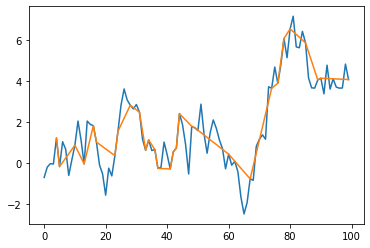

In [ ]:
nn = 30
Xn = np.array(sorted(np.random.choice(X, size=nn, replace=False)))
Yn = np.array([Y[int(i)] for i in Xn])
plt.plot(X, Y)
plt.plot(Xn, Yn)

Tc = Xn.reshape((nn,1))
Xc = Yn.reshape((nn,1))

Text(0, 0.5, '$\\Omega$')

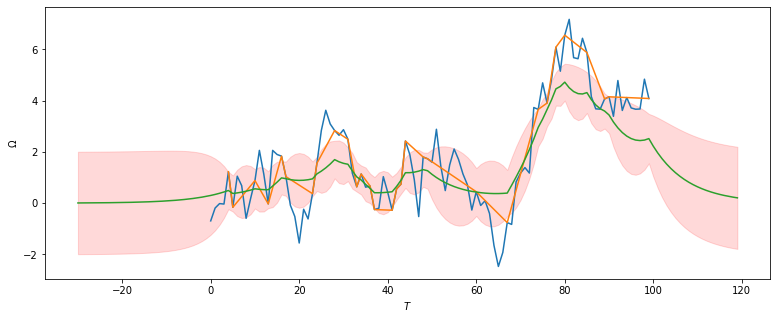

In [ ]:
# Extrapolação
Td = np.array([i for i in range(-30,120)]).reshape((150,1))

#Interpolação
#Td = np.array([i for i in np.arange(0.5, n, 1)]).reshape((n,1))

#Modelos
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_linear, ruido=1)
Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_rbf, kernel_parametros=[.5], ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_constante, k_rbf, mu_parametros=[10], kernel_parametros=[.5], ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_laplaciano, kernel_parametros=[.2], ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_constante, k_laplaciano, mu_parametros=[10], kernel_parametros=[.2], ruido=1)



mud = Xd.flatten()
sigmad = np.diag(Sd)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
ax.plot(X, Y, label='Original')
ax.plot(Tc.flat, Xc.flat, label='Original')
ax.plot(Td.flat, mud)
_ = ax.fill_between( Td.flat, mud - 2*sigmad, mud + 2*sigmad, color='red', alpha=0.15,)
ax.set_xlabel("$T$")
ax.set_ylabel("$\Omega$")

### Combinando Kernels

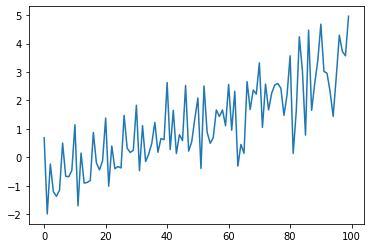

In [ ]:
n = 100
p = 10
csp = np.random.randn(p)
lin = np.linspace(-1, 3, n)
Y = np.zeros(n)
for i in range(0, n, p):
  Y[i:i+p] = csp + lin[i:i+p] + np.random.normal(0, i/n, p)

plt.plot(Y)

Tc = np.array([[i] for i in range(n)])
Xc = Y.reshape((n,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


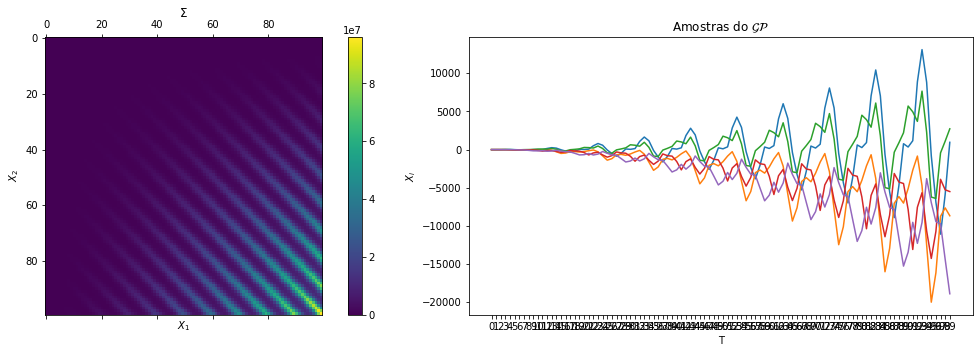

In [ ]:
k_comb = lambda x1, y1, p: k_linear(x1, y1, []) * k_periodico(x1, y1, [10, 1, 1])
k_comb2 = lambda x1, y1, p: k_polinomial(x1, y1, [2]) * k_periodico(x1, y1, [10, 1, 1])

plotar_kernel(Tc,Tc, k_comb2, [])

Text(0, 0.5, '$\\Omega$')

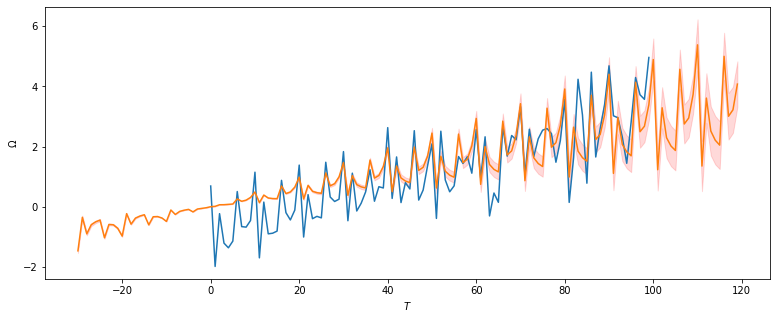

In [ ]:
# Extrapolação
Td = np.array([i for i in range(-30,120)]).reshape((150,1))

#Interpolação
#Tc = np.array([i for i in np.arange(0.5, n, 1)]).reshape((n,1))

#Modelos
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_linear, ruido=1)
Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_comb,  ruido=1)
#Xd, Sd = GP(Tc, Xc, Td, m_zeros, k_comb2,  ruido=1)


mud = Xd.flatten()
sigmad = np.diag(Sd)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
ax.plot(Tc.flat, Xc.flat, label='Original')
ax.plot(Td.flat, mud)
_ = ax.fill_between( Td.flat, mud - 2*sigmad, mud + 2*sigmad, color='red', alpha=0.15,)
ax.set_xlabel("$T$")
ax.set_ylabel("$\Omega$")